In [1]:
#Importing Libararies
import keras
import PIL
import numpy as np
import cv2
import random
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout

Using TensorFlow backend.


In [2]:
classifier=Sequential()

In [3]:
#Part1 -Convolution
classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))

In [4]:
#Part 2-Pooling
classifier.add(MaxPooling2D(pool_size=(2,2)))

# adding another convolutional layer to imoprove the accuracy
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size= (2,2)))

In [5]:
#Part 3-Flattening
classifier.add(Flatten())

In [6]:
#Part 4-Full Connection
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(0.6))
classifier.add(Dense(units=64, activation='relu'))
classifier.add(Dropout(0.3))
classifier.add(Dense(units=1, activation='sigmoid'))
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

In [7]:
# Compiling
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [8]:
#fitting CNN to images
from keras.preprocessing.image import ImageDataGenerator
training_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
testing_datagen = ImageDataGenerator(rescale=1./255)

training_set = training_datagen.flow_from_directory('/content/drive/My Drive/Minor Project/dataset', 
                                                    target_size=(64,64), 
                                                    batch_size=32, 
                                                    class_mode='binary')


Found 1376 images belonging to 2 classes.


In [9]:
test_set = testing_datagen.flow_from_directory('/content/drive/My Drive/Minor Project/Test_Set',
                                                target_size=(64,64), 
                                                batch_size=32,
                                                class_mode='binary')

Found 96 images belonging to 2 classes.


In [10]:
classifier.fit_generator(training_set, 
                         steps_per_epoch=100/8, 
                         epochs=8, 
                         validation_data=test_set, 
                         validation_steps=8/8)

Epoch 1/8
13/12 [===============================] - 5s 347ms/step - loss: 0.7269 - accuracy: 0.4976 - val_loss: 0.6787 - val_accuracy: 0.6562
Epoch 2/8
13/12 [===============================] - 4s 271ms/step - loss: 0.6281 - accuracy: 0.6827 - val_loss: 0.4440 - val_accuracy: 0.9375
Epoch 3/8
13/12 [===============================] - 4s 323ms/step - loss: 0.4218 - accuracy: 0.8462 - val_loss: 0.2778 - val_accuracy: 0.9062
Epoch 4/8
13/12 [===============================] - 4s 319ms/step - loss: 0.2690 - accuracy: 0.9062 - val_loss: 0.2729 - val_accuracy: 0.8750
Epoch 5/8
13/12 [===============================] - 4s 276ms/step - loss: 0.2367 - accuracy: 0.8966 - val_loss: 0.0997 - val_accuracy: 0.9688
Epoch 6/8
13/12 [===============================] - 4s 317ms/step - loss: 0.1843 - accuracy: 0.9423 - val_loss: 0.1253 - val_accuracy: 0.9375
Epoch 7/8
13/12 [===============================] - 4s 316ms/step - loss: 0.1725 - accuracy: 0.9471 - val_loss: 0.0166 - val_accuracy: 1.0000
Epoch 

In [11]:
test_pred = classifier.predict(test_set)>0.5
test_pred

array([[False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [

In [12]:
# predictions for with_mask image using train model
import numpy as np
from keras.preprocessing import image
tested_image = image.load_img('/content/drive/My Drive/Minor Project/dataset/with_mask/104-with-mask.jpg',target_size=(64,64))
tested_image = image.img_to_array(tested_image)
tested_image = np.expand_dims(tested_image,axis = 0)
output = classifier.predict(tested_image)
training_set.class_indices
if output[0][0] ==1:
  prediction = 'without mask'
  print(prediction )
else:
  prediction = 'with mask'
  print(prediction )

with mask


In [13]:
# predictions for without_mask image using train model
import numpy as np
from keras.preprocessing import image
tested_image = image.load_img('/content/drive/My Drive/Minor Project/dataset/without_mask/175.jpg',target_size=(64,64))
tested_image = image.img_to_array(tested_image)
tested_image = np.expand_dims(tested_image,axis = 0)
output = classifier.predict(tested_image)
training_set.class_indices
if output[0][0] ==1:
  prediction = 'without mask'
  print(prediction )
else:
  prediction = 'with mask'
  print(prediction )

without mask


In [14]:
#Cascade Files
eye_cascade= cv2.CascadeClassifier('/content/drive/My Drive/Minor Project/haarcascade_eye.xml')
face=cv2.CascadeClassifier('/content/drive/My Drive/Minor Project/haarcascade_frontalface_alt.xml')
mouth=cv2.CascadeClassifier('/content/drive/My Drive/Minor Project/haarcascade_smile.xml')

In [15]:
#Testing image for open cv
test_image = cv2.imread('/content/drive/My Drive/Minor Project/dataset/with_mask/290-with-mask.jpg')

In [16]:
gray= cv2.cvtColor(test_image,cv2.COLOR_BGR2GRAY)
bw_threshold=80
(thresh,black_and_white)=cv2.threshold(gray,bw_threshold,255,cv2.THRESH_BINARY)

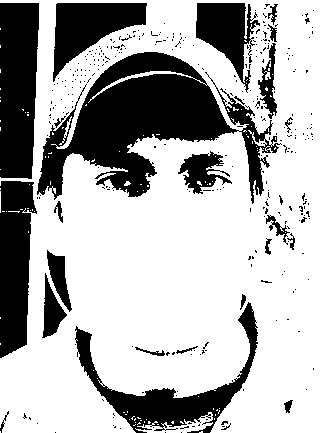

In [17]:
from google.colab.patches import cv2_imshow
cv2_imshow(black_and_white)

In [18]:
eyes= eye_cascade.detectMultiScale(black_and_white,1.1,4)
f = face.detectMultiScale(gray, 1.1, 4)
face_bw=face.detectMultiScale(black_and_white,1.1,4)

In [19]:
font=cv2.FONT_HERSHEY_SIMPLEX
org=(30,30)
weared_mask_font_color=(55,25,155)
not_weared_mask_font_color=(10,60,55)
thickness=2
font_scale=1
weared_mask="Mask Detected"
not_weared_mask="Not Mask Detected"

In [20]:
if(len(f)==0 and len(face_bw)==0):
  cv2.putText(test_image,weared_mask,org,font,font_scale,weared_mask_font_color,thickness,cv2.LINE_AA)
  
elif(len(f)==0 and len(face_bw)==1):
  cv2.putText(test_image,not_weared_mask,org,font,font_scale,weared_mask_font_color,thickness,cv2.LINE_AA)
 
else:
  for(x,y,w,h) in f:
    cv2.rectangle(test_image,(x,y),(x+w,y+h),(255,255,255),2)
    roi_gray=gray[y:y+h,x:x+w]
    roi_color=test_image[y:y+h,x:x+w]   

mouth_rects=mouth.detectMultiScale(gray,1.5,5)  

In [21]:
len(f)

0

In [22]:
len(face_bw)

0

In [23]:
len(mouth_rects)

2

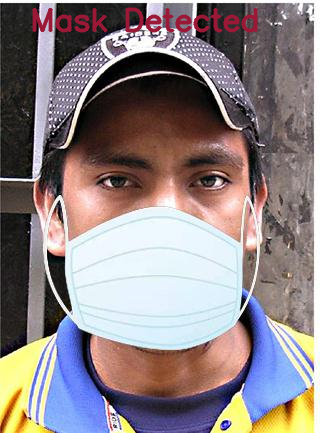

In [24]:
if(len(f)==0 and len(face_bw)==0):
  cv2.putText(test_image,"Mask Detected",org,font,font_scale,weared_mask_font_color,thickness,cv2.LINE_AA)
elif(len(f)==0 and len(face_bw)==1):
  cv2.putText(test_image,org,font,font_scale,weared_mask_font_color,thickness,cv2.LINE_AA)
  print("Not Found")
elif len(f)>0 :
  if (len(face_bw)==0 or len(face_bw)>1):
    if  len(mouth_rects)==0 or len(mouth_rects):
      cv2.putText(test_image,weared_mask,org,font,font_scale,weared_mask_font_color,thickness,cv2.LINE_AA)
    elif len(mouth_rects)>0 and y<my<y+h:
      for(mx,my,mw,mh) in mouth_rects:
        cv2.putText(test_image,not_weared_mask,org,font,font_scale,not_weared_mask_font_color,thickness,cv2.LINE_AA) 
        cv2.rectangle(test_image,(mx,my),(mx+mh,my+mw),(0,0,255),5)
        break    

cv2_imshow(test_image)       